### General Quantum Fourier Transform Algorithm

In [ ]:
from qiskit import QuantumCircuit
from qiskit import quantum_info
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit import transpile

import numpy as np

/Users/isambalghari/MS Physics/Summer-23-24/Intro to Quantum Computing/Qiskit/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


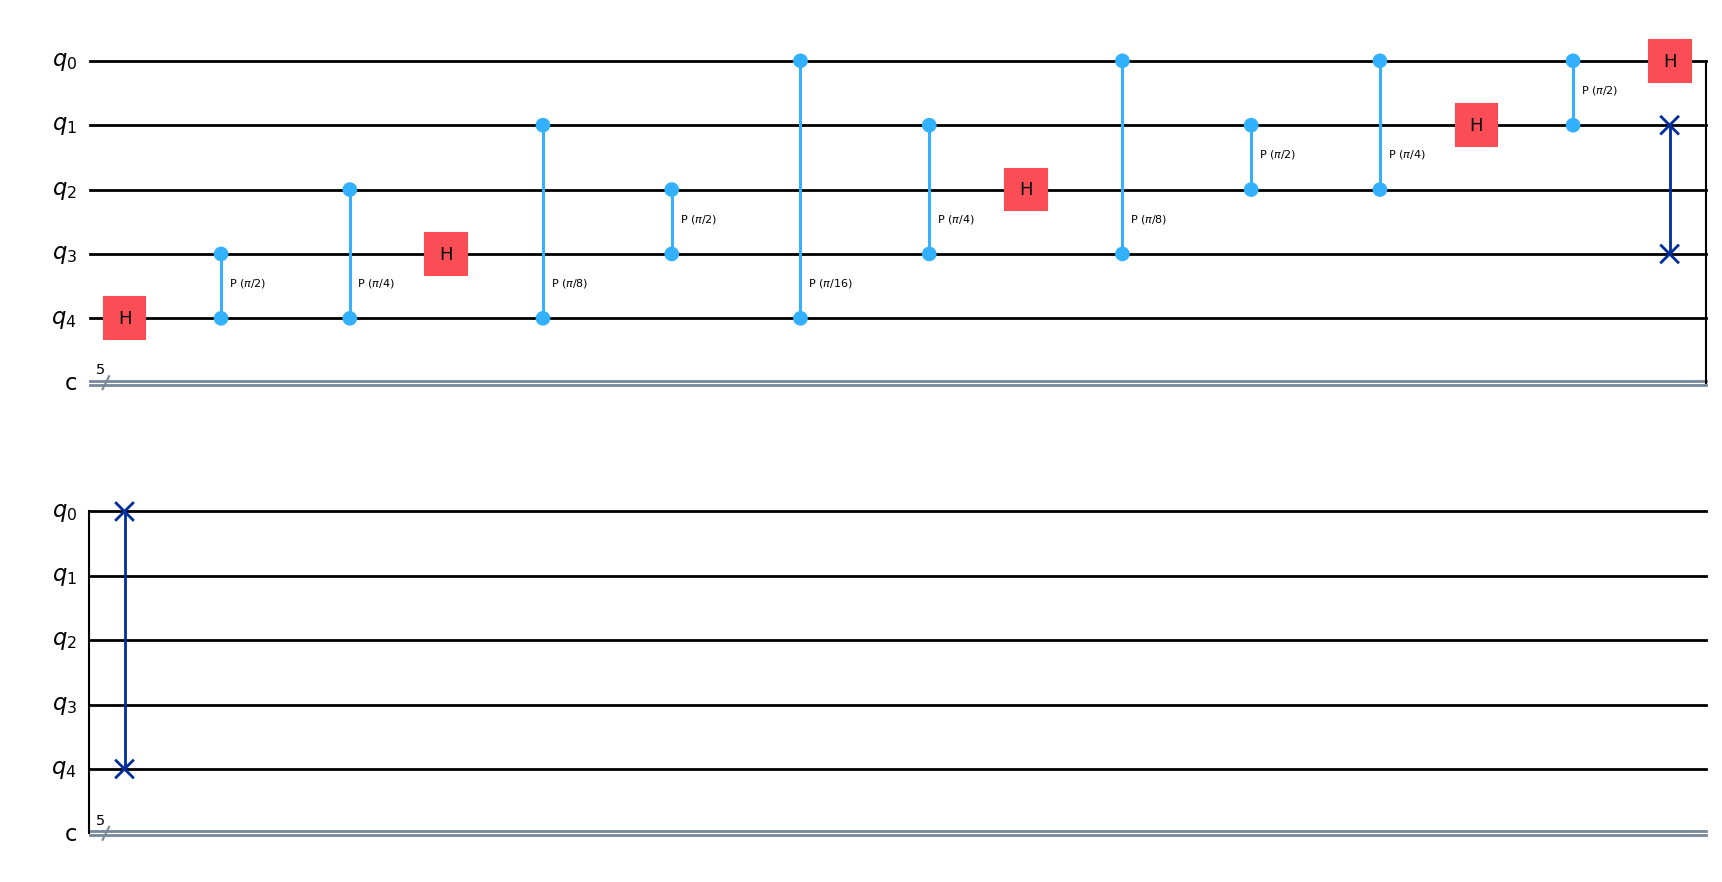

In [ ]:
def QFT(num_qubits):
    circuit = QuantumCircuit(num_qubits, num_qubits)


    for qubit in range(num_qubits-1, -1, -1):
        circuit.h(qubit)
        # print('qubit: ', qubit)
        for p in range(qubit-1, -1, -1):
            # print('p: ', p)
            exponent = 2**(qubit-p)
            # print('exponent: ', exponent)
            circuit.cp(np.pi/exponent, p, qubit)
            # circuit.cp(np.pi/8, 0, 2)

        # circuit.h(qubit)


        # circuit.h(1)
        # circuit.cp(np.pi/2, 0, 1)
        # circuit.h(0)

        # circuit.swap(0, 2)
    from math import floor
    for qubit in range(floor(num_qubits/2)):
        # print('swap qubit: ', qubit)
        circuit.swap(qubit, num_qubits-qubit-1)
    # circuit.swap(1,)

    # circuit.draw('mpl')
    return circuit

num_qubits = 5
circuit3 = QFT(num_qubits)
circuit3.draw('mpl')

#### For Input State: 01011

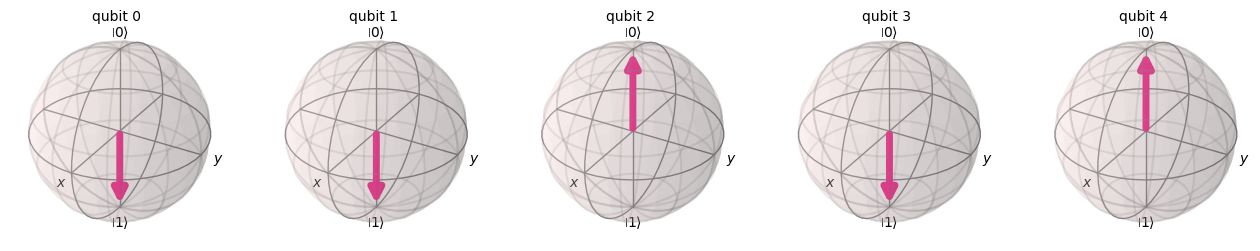

In [ ]:
ket0 = quantum_info.Statevector([1, 0])
ket1 = quantum_info.Statevector([0, 1])
input_state = quantum_info.Statevector(ket0^ket1^ket0^ket1^ket1)

input_state.draw('bloch')

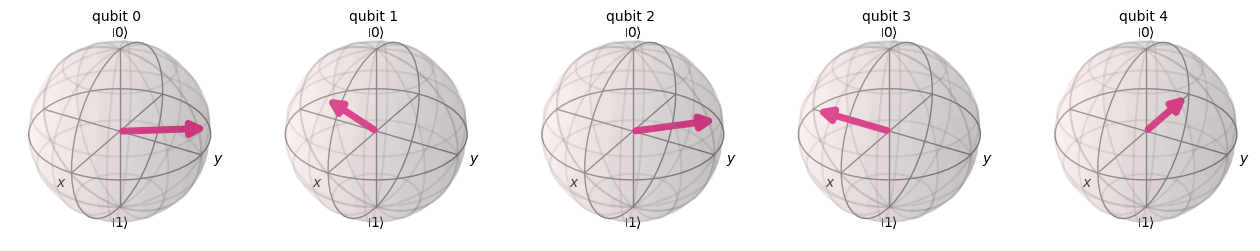

In [ ]:
output_state = input_state.evolve(circuit3)
output_state.draw('bloch')

#### For Input State: 11111

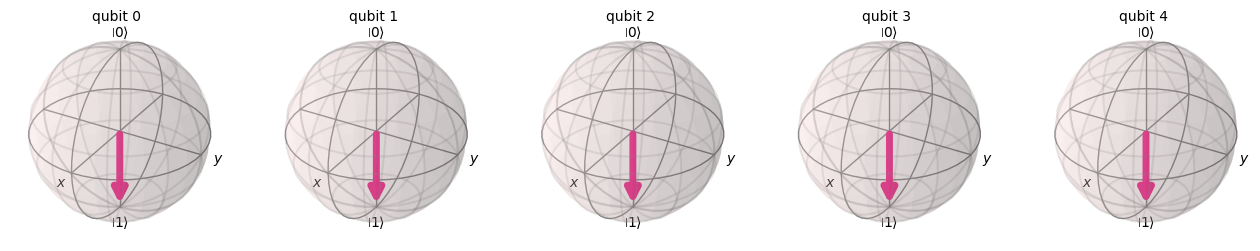

In [ ]:
input_state = quantum_info.Statevector(ket1^ket1^ket1^ket1^ket1)
input_state.draw('bloch')

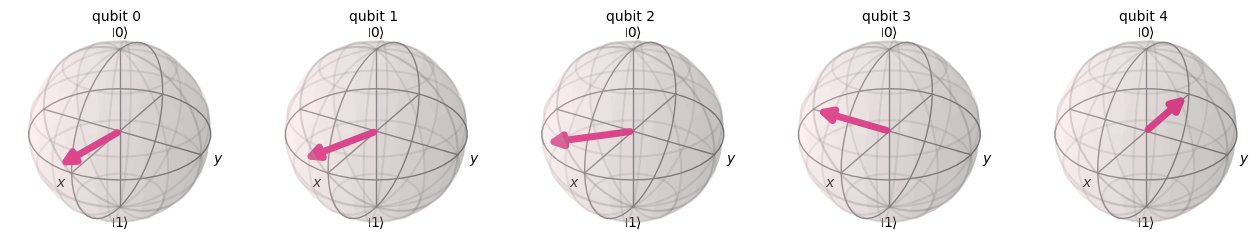

In [ ]:
output_state = input_state.evolve(circuit3)
output_state.draw('bloch')

#### Comparing with QFT qiskit library.

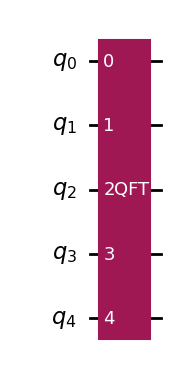

In [ ]:
from qiskit.circuit.library import QFT

qft_lib = QFT(5)
qft_lib.draw('mpl')

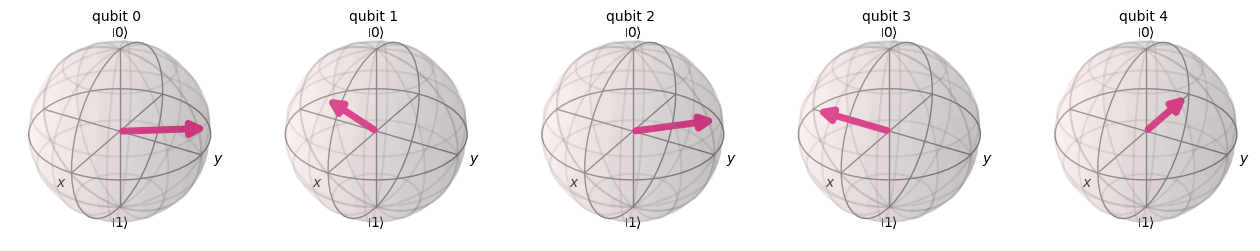

In [ ]:
input_state = quantum_info.Statevector(ket0^ket1^ket0^ket1^ket1)
output_state = input_state.evolve(qft_lib)
output_state.draw('bloch')

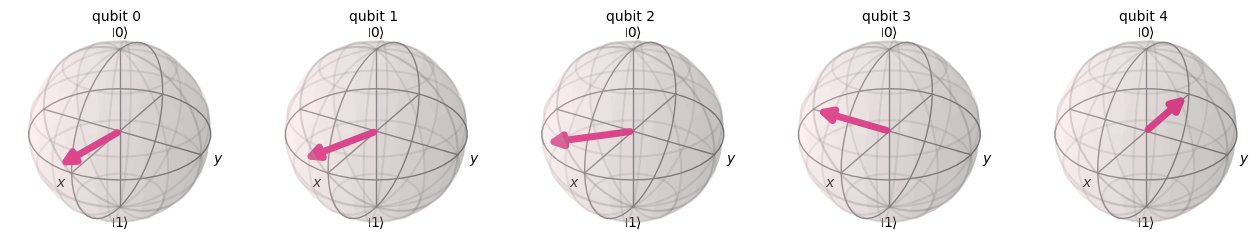

In [ ]:
input_state = quantum_info.Statevector(ket1^ket1^ket1^ket1^ket1)
output_state = input_state.evolve(qft_lib)
output_state.draw('bloch')

State using Q3 implementation of QFT.

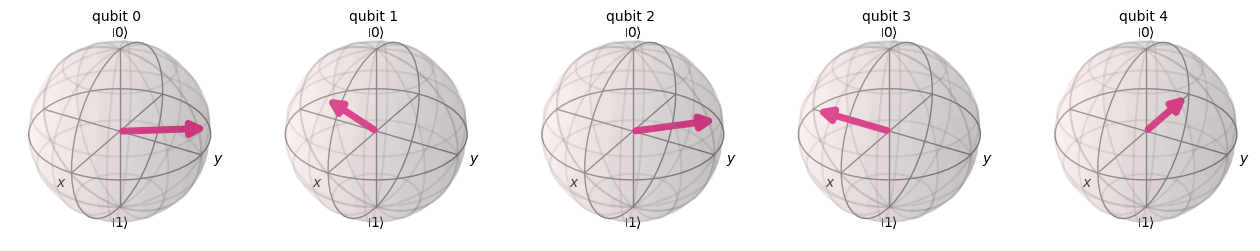

In [ ]:
input_state = quantum_info.Statevector(ket0^ket1^ket0^ket1^ket1)
output_state = input_state.evolve(circuit3)
output_state.draw('bloch')

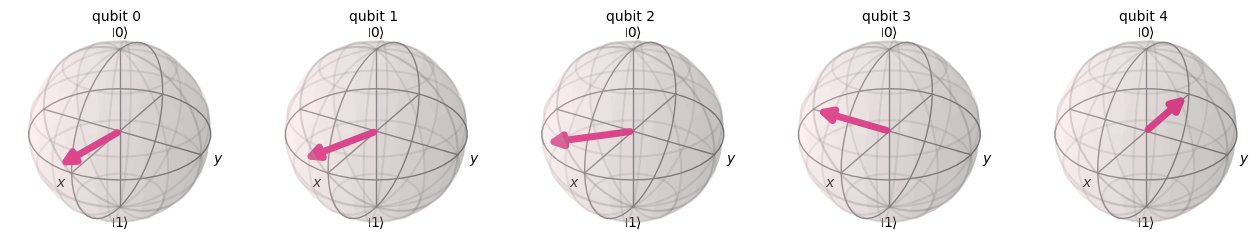

In [ ]:
input_state = quantum_info.Statevector(ket1^ket1^ket1^ket1^ket1)
output_state = input_state.evolve(circuit3)
output_state.draw('bloch')